In [31]:
import dgl
import torch
import os
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

In [148]:
from cell import utils, plot_utils

In [2]:
from dgl.data import RedditDataset

In [16]:
data = RedditDataset(self_loop=True)

Finished data loading.
  NumNodes: 232965
  NumEdges: 114848857
  NumFeats: 602
  NumClasses: 41
  NumTrainingSamples: 153431
  NumValidationSamples: 23831
  NumTestSamples: 55703


In [4]:
data.graph.number_of_nodes()

232965

In [6]:
data.graph.number_of_src_nodes()

232965

In [7]:
data.graph.number_of_edges()

114848857

In [8]:
data.graph.has_edge_between(0, 1)

False

In [9]:
data.graph.predecessors(0)

tensor([     0,    242,    249,  ..., 232537, 232554, 232685])

In [10]:
data.graph.successors(0)

tensor([225202, 177307, 107546,  ...,  18371,  72216,      0])

In [11]:
data.graph.find_edges(0)

(tensor([0]), tensor([225202]))

In [12]:
data.graph.out_edges(0)

(tensor([0, 0, 0,  ..., 0, 0, 0]),
 tensor([225202, 177307, 107546,  ...,  18371,  72216,      0]))

In [13]:
data.graph.in_edges(0)

(tensor([     0,    242,    249,  ..., 232537, 232554, 232685]),
 tensor([0, 0, 0,  ..., 0, 0, 0]))

In [14]:
data.graph.in_degree(0)

2205

In [15]:
data.graph.nodes()

tensor([     0,      1,      2,  ..., 232962, 232963, 232964])

In [16]:
data.graph.edges()

(tensor([     0,    242,    249,  ..., 232594, 232634, 232964]),
 tensor([     0,      0,      0,  ..., 232964, 232964, 232964]))

In [21]:
data.graph.edata

{}

In [22]:
data.train_mask

array([False,  True, False, ...,  True,  True, False])

In [24]:
data.features.shape

(232965, 602)

In [25]:
data.labels

array([30, 17, 18, ...,  3, 13, 13], dtype=int32)

In [26]:
data.graph.all_edges()

(tensor([     0,    242,    249,  ..., 232594, 232634, 232964]),
 tensor([     0,      0,      0,  ..., 232964, 232964, 232964]))

In [27]:
g = dgl.graph(data.graph.all_edges())

In [5]:
model_dir = "/Users/fahimehb/Documents/git-workspace/celltypes/dgl/examples/pytorch/graphsage/"

In [46]:
cldf = utils.read_visp_npp_cldf()

Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


In [176]:
model_output = torch.load("/Users/fahimehb/Downloads/emb_run15000.pkl")

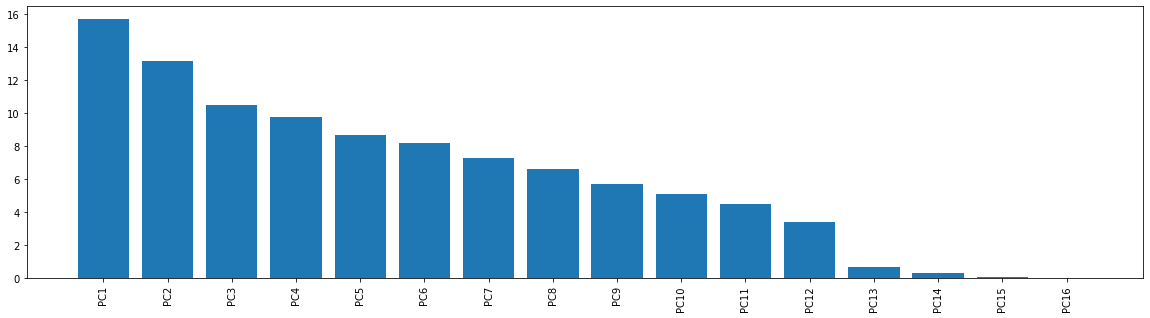

In [177]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

vectors = model_output

pca = PCA(n_components=16)
pca.fit(vectors)
pca_data = pca.transform(vectors)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(20,5))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label= labels)
plt.xticks(rotation = 90)
plt.show()

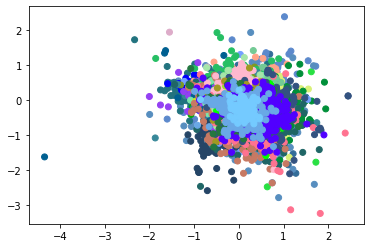

In [178]:
df = pd.DataFrame(model_output)
df['cluster_id'] =  data.labels.astype('str')
df = df.merge(cldf['cluster_color'], on='cluster_id')
plt.scatter(df[0], df[1], c = df['cluster_color'])

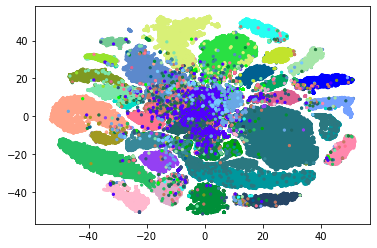

In [200]:
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2 , random_state=42)
# emb_2d = tsne.fit_transform(model_output[0:100000])
df = pd.DataFrame(emb_2d)
df['cluster_id'] = data.labels[0:100000].astype('str')
df = df.merge(cldf, on='cluster_id')
plt.scatter(df[0], df[1], c=df['cluster_color'], s=5)

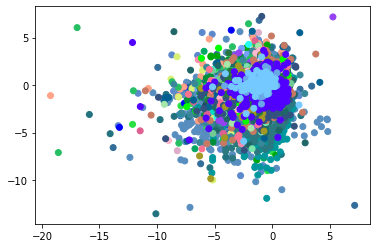

In [65]:
model_output = torch.load(os.path.join(model_dir, "best_emb80.pkl"))
df = pd.DataFrame(model_output)
df['cluster_id'] =  data.labels.astype('str')
df = df.merge(cldf['cluster_color'], on='cluster_id')
plt.scatter(df[0], df[1], c = df['cluster_color'])

In [76]:
cldf = utils.read_visp_npp_cldf()
cldf

Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


,dendcluster_id,cluster_label,colors,cluster_color,subclass_id,subclass_label,subclass_color,class_id,class_label,class_color
cluster_id,,,,,,,,,,
0,1,L2/3 IT VISp Rrad,#D9F077,#D9F077,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1
1,2,L2/3 IT VISp Adamts2,#A6E6A9,#A6E6A9,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1
2,3,L2/3 IT VISp Agmat,#7AE6AB,#7AE6AB,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1
3,7,L4 IT VISp Rspo1,#00979D,#00979D,8,L4,#00979D,2,Glutamatergic,#27AAE1
4,8,L5 IT VISp Hsd11b1 Endou,#00DDC5,#00DDC5,9,L5 IT,#008A61,2,Glutamatergic,#27AAE1
...,...,...,...,...,...,...,...,...,...,...
88,111,Pvalb Gpr149 Islr,#E62A5D,#E62A5D,6,Pvalb,#D93137,1,GABAergic,#EF4136
89,112,Pvalb Reln Itm2a,#E67A77,#E67A77,6,Pvalb,#D93137,1,GABAergic,#EF4136
90,113,Pvalb Reln Tac1,#D6221D,#D6221D,6,Pvalb,#D93137,1,GABAergic,#EF4136


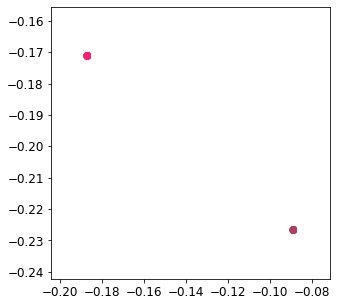

In [210]:
model_output = torch.load(os.path.join(model_dir, "June_0.pkl"))
df = pd.DataFrame(model_output)
df['cluster_id'] =  [str(i) for i in range(93)]
df = df.merge(cldf['cluster_color'], on='cluster_id')
df.columns = ["Z0", "Z1", "Z2", 'cluster_id', 'cluster_color']
fig= plot_utils.plot_embedding(df, plot_dim=2, annotation=False, plot_size=(5,5))

In [124]:
model_output

array([[ 0.0145475 ,  0.6284245 ,  1.0265253 ],
       [ 0.03700387,  0.6043217 ,  0.99009424],
       [ 0.06820652,  0.5708314 ,  0.93947417],
       [ 0.10657662,  0.5296481 ,  0.8772263 ],
       [ 0.08449194,  0.553352  ,  0.9130543 ],
       [ 0.04869086,  0.59177786,  0.9711344 ],
       [ 0.04961476,  0.5907862 ,  0.9696356 ],
       [ 0.07633463,  0.5621074 ,  0.92628795],
       [ 0.05672249,  0.5831574 ,  0.9581047 ],
       [ 0.06393036,  0.57542104,  0.9464114 ],
       [ 0.05856392,  0.58118093,  0.95511734],
       [ 0.0443207 ,  0.59646845,  0.97822416],
       [ 0.07512864,  0.56340176,  0.92824435],
       [ 0.02951857,  0.6123558 ,  1.0022377 ],
       [ 0.06992617,  0.56898564,  0.93668437],
       [ 0.06792492,  0.5711337 ,  0.93993104],
       [ 0.02162576,  0.62082726,  1.0150422 ],
       [ 0.0145475 ,  0.6284245 ,  1.0265253 ],
       [ 0.0145475 ,  0.6284245 ,  1.0265253 ],
       [ 0.19727607,  0.43229893,  0.7300844 ],
       [ 0.19727607,  0.43229893,  0.730

In [135]:
import scipy.io as sio
Temp = sio.loadmat('/Users/fahimehb/Downloads/DE_gene_dict.mat')
D = {}
for key in Temp.keys():
    if key[0]=='n':
        L = []
        for gene in Temp[key]:
            L.append(gene.strip(' '))
        D[key] = L
del Temp

In [138]:
D['n4']

['Gad1',
 'Gad2',
 'Slc17a7',
 'Slc32a1',
 'Slc6a1',
 'Neurod2',
 'Dlx6os1',
 'Sv2b',
 'Nrn1',
 'Dlx1',
 'Rpp25',
 'Satb2',
 'Rprml',
 '9130024F11Rik',
 'Dlx1as',
 'Tbr1',
 'Kcnip1',
 'Neurod6',
 'Erbb4',
 'Ptk2b']